In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
import api_keys as api_key
print(api_key)


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



<module 'api_keys' from '/Users/johannahamrick_1/Desktop/Homework_Solutions/weatherpy/api_keys.py'>


## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['albany', 'hobart', 'qaanaaq', 'khatanga', 'mataura', 'moron', 'upernavik', 'hit', 'otjimbingwe', 'bambous virieux', 'grindavik', 'san patricio', 'kahului', 'illoqqortoormiut', 'vestmanna', 'santa catalina', 'busselton', 'hithadhoo', 'bukachacha', 'cape town', 'kapaa', 'ye', 'cherskiy', 'lolua', 'honningsvag', 'ushuaia', 'komsomolskiy', 'ambulu', 'norman wells', 'bethel', 'east london', 'barrow', 'bengkulu', 'taolanaro', 'yellowknife', 'belushya guba', 'mar del plata', 'clyde river', 'lewistown', 'bredasdorp', 'lorengau', 'cayenne', 'sandnessjoen', 'weyburn', 'jamestown', 'sarh', 'sorland', 'pando', 'vanimo', 'roma', 'mareeba', 'chokurdakh', 'butaritari', 'port alfred', 'kidal', 'sao filipe', 'saldanha', 'labuhan', 'kamenskoye', 'victoria', 'saint-philippe', 'leiyang', 'arraial do cabo', 'uncia', 'souillac', 'rio grande', 'svetlogorsk', 'gayny', 'georgetown', 'ponta do sol', 'qafsah', 'cabo san lucas', 'punta arenas', 'vallenar', 'saskylakh', 'chuy', 'esperance', 'frankfort', 'sao joa

In [17]:
# Create DataFrame
df = pd.DataFrame({'name': cities})
print(df)


                 name
0              albany
1              hobart
2             qaanaaq
3            khatanga
4             mataura
5               moron
6           upernavik
7                 hit
8         otjimbingwe
9     bambous virieux
10          grindavik
11       san patricio
12            kahului
13   illoqqortoormiut
14          vestmanna
15     santa catalina
16          busselton
17          hithadhoo
18         bukachacha
19          cape town
20              kapaa
21                 ye
22           cherskiy
23              lolua
24        honningsvag
25            ushuaia
26       komsomolskiy
27             ambulu
28       norman wells
29             bethel
..                ...
581             kathu
582            ulundi
583             annau
584            chakan
585        belousovka
586        jaipur hat
587         skalistyy
588          vikulovo
589        edmundston
590         jiaojiang
591            camana
592        moses lake
593        san andres
594       

In [21]:
# Save to csv file
df.to_csv('cities.csv')

## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = "c23294b8a05029f6812db05bac9a2bbd"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city = "tura"
units = "imperial"

#Test
test_city = "tura"

query_url = f"{url}appid={api_key}&q={city}&units={units}"
print(api_key)

print(query_url)






c23294b8a05029f6812db05bac9a2bbd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c23294b8a05029f6812db05bac9a2bbdappid=c23294b8a05029f6812db05bac9a2bbd&q=tura&units=imperial


In [6]:
# Import the cities.csv and make DF, take random samples
cities_df = pd.read_csv("cities.csv")
cities_final_df = pd.DataFrame({"name": cities})
#cities_df.head()
cities_final_df = cities_final_df.sample(n=500)
cities_final_df.head()
cities_final_df.to_csv("cities_final.csv")

In [18]:
# lists for holding values for tempp (F), humidity (%), cloudiness (%), windspeed (mph)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
open_weather_city_number = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_name=[]
latitude=[]
longitude=[]
hold_value = 0



#Query the API with coordinates and create lists for temp, humidy, wind speed, cloudiness
query_url = f"{url}APPID={api_key}&q={city}&units={units}"
for index, row in cities_final_df.iterrows():
    city = row["name"]
    query = f"{url}APPID={api_key}&q={city}&units={units}"
    response = requests.get(query).json()
    print(response)
    

    



 

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
{'cod': 401, 'messa

In [8]:
# Create DataFrame from json 
city_sample = pd.DataFrame(data = city_name, columns = ["Cities"])
city_sample.head()


,Cities


In [9]:
city_sample.to_csv('city_sample.csv')

In [20]:
city_sample["City ID Number"] = open_weather_city_number
city_sample["Current Temperature"] = temp
city_sample["Current Humidity"] = humidity
city_sample["Current Cloudiness"] = cloudiness
city_sample["Current Wind Speed"] = windspeed
city_sample["Latitude"] = latitude
city_sample["Longitude"] = longitude

city_sample.head()


,Cities,City ID Number,Current Temperature,Current Humidity,Current Cloudiness,Current Wind Speed,Latitude,Longitude


In [11]:
city_sample.to_csv('city_sample2.csv')

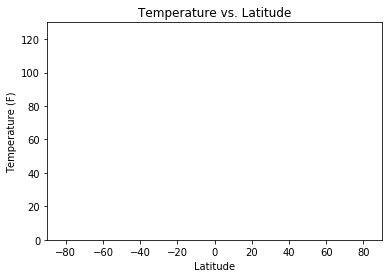

In [12]:
# Temperature vs.Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Temperature"])
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(0,130)

# write plot to png file
plt.savefig("temp_vs_lat.png")
# display plot
plt.show()


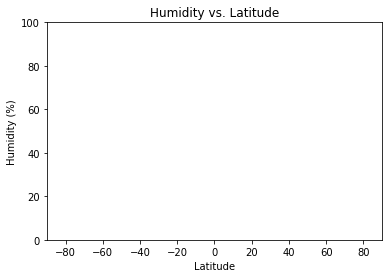

In [13]:
# Humidity vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Humidity"])
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.ylim(0,100)

# write plot to png file
plt.savefig("humid_vs_lat.png")
# display plot
plt.show()


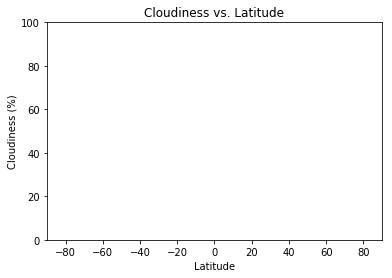

In [14]:
# Cloudiness vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Cloudiness"])
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90,90)
plt.ylim(0,100)

# write plot to png file
plt.savefig("cloud_vs_lat.png")
# display plot
plt.show()


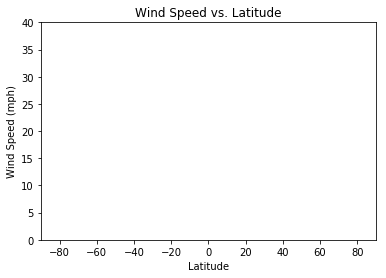

In [15]:
# Windspeed vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Wind Speed"])
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.ylim(0,40)

# write plot to png file
plt.savefig("windsp_vs_lat.png")
# display plot
plt.show()


Three observations of WeatherPy
1. Temperatures increses as the latitude approaches the equator (latitude 0)
2. Humidity is more concentrated at higher levels as the latitude approaches the equator (latitude 0)
3  Wind speeds ncrease as the latitude is further away from the equator (lat -90 and 90)
